# Cannabis Strains EDA

# Introduction
This dataset was obtained by scraping data from online reviews of different cannabis strains. It contains information on 2170 strains, mostly pertaining to their physiological and psychological effects, as well as their flavour profile. This is an exploratory analysis of trends in the data to see what can be done with it and if there are correlations between certain flavours and the effects of administering the drug.

## Loading the data and preliminary analysis

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Results/StrainScrape_full_2018-10-23.csv', low_memory=False)
print(df.shape)
df.head()

(2170, 84)


,Strain Name,Species,Review Count,Rating Value,Pain,Euphoric,Fatigue,Paranoid,Focused,Spasticity,...,Spicy/Herbal,Woody,Blueberry,Sweet,Lavender,Nutty,Apricot,Diesel,Menthol,Mango
0,White Fire OG,hybrid,650,4.5,61.287931,94.691754,0.000000,23.969588,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0
1,Ice,hybrid,167,4.1,84.145806,94.188232,60.254721,45.435467,0.0,0.0,...,0,0,0,0,0,0,0,0,1,0
2,Ghost OG,hybrid,407,4.5,96.972863,69.354634,0.000000,24.476122,0.0,0.0,...,0,0,0,0,0,0,0,0,0,0
3,Sour Diesel,sativa,5110,4.4,66.895824,72.064745,39.767464,37.301937,0.0,0.0,...,0,0,0,0,0,0,0,1,0,0
4,Granddaddy Purple,indica,3169,4.4,85.895787,66.075548,0.000000,0.000000,0.0,0.0,...,0,0,0,1,0,0,0,0,0,0


In [3]:
def display_all(df):
    with pd.option_context("display.max_rows", 1000, "display.max_columns", 1000): 
        display(df)

In [4]:
display_all(df.head(10).T)

,0,1,2,3,4,5,6,7,8,9
Strain Name,White Fire OG,Ice,Ghost OG,Sour Diesel,Granddaddy Purple,Moby Dick,Lost Sierra Night Nurse,Golden Calyx,Broke Diesel,Lake of Fire
Species,hybrid,hybrid,hybrid,sativa,indica,sativa,hybrid,sativa,hybrid,hybrid
Review Count,650,167,407,5110,3169,444,1,4,2,43
Rating Value,4.5,4.1,4.5,4.4,4.4,4.3,5,5,5,4.5
Pain,61.2879,84.1458,96.9729,66.8958,85.8958,55.1302,100,100,50,89.5522
Euphoric,94.6918,94.1882,69.3546,72.0647,66.0755,91.4967,0,0,100,0
Fatigue,0,60.2547,0,39.7675,0,36.2294,0,0,0,41.4179
Paranoid,23.9696,45.4355,24.4761,37.3019,0,29.8955,0,0,0,0
Focused,0,0,0,0,0,0,100,0,0,0
Spasticity,0,0,0,0,0,0,0,0,0,0


As you can see, the majority of the columns are numeric. The values for each of the effects are based on prevalence of those effects in self-reported reviews of customers. For each strain, there are at most 5 effects in 3 parent categories: Effects, Medical, and Negatives.

- Effects refers to positive side effects, mostly pertaining to the mood it seems to elicit. 

- Medical refers to what medicinal properties the cannabis strain exhibits, also self-reported, and this is perhaps the most interesting class of information in this dataset.

- Negatives are the negative side effects, such as Dry Mouth, Dry Eyes, Dizzy, Anxious, and Paranoid. These are also interesting because they may contribute negatively to the reviews for a particular strain.

The data is stored in a sparse matrix representation, which unfortunately means that there are a lot of zeroes for each strain. This is because the source of the data only displayed at most 15 effects and 3 flavours, even though the two together make up 80 columns.

In [5]:
display_all(df.describe(include='all').T)

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Strain Name,2170,2168,Afgooey,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Species,2170,3,hybrid,1119,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Review Count,2170,NaN,NaN,NaN,101.154,354.493,0,8,23,66,8967
Rating Value,2170,NaN,NaN,NaN,4.45134,0.317741,1,4.3,4.5,4.6,5
Pain,2170,NaN,NaN,NaN,55.0895,39.7858,0,6.00376,63.6395,96.7019,100
Euphoric,2170,NaN,NaN,NaN,53.0109,38.5489,0,0,61.3702,89.9781,100
Fatigue,2170,NaN,NaN,NaN,21.0022,32.7622,0,0,0,43.0086,100
Paranoid,2170,NaN,NaN,NaN,15.2524,26.4027,0,0,0.835342,19.3075,100
Focused,2170,NaN,NaN,NaN,18.938,34.0289,0,0,0,27.2967,100
Spasticity,2170,NaN,NaN,NaN,1.52623,10.9513,0,0,0,0,100


## Preliminary data visualizations
We can do some preliminary visualizations in order to examine various distributions, for instance rating, review count, species, as well as the average values of the different effects and flavours to see how prevalent they are overall. We can then examine these by different flavours, for instance, to see which effects are most prevalent for a particular flavour.

### Strains by species

In [6]:
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go

init_notebook_mode(connected=True)

data = [go.Histogram(x=df.Species)]

iplot(data, filename='strains-by-species')

### Bar plots of effects and flavours

In [7]:
def plot_bar(df, cols, metric='mean'):
    '''Generates a plotly bar graph with the given metric over the given column names.'''
    if metric == 'sum':
        col_vals = df[cols].sum()
    elif metric == 'mean':
        col_vals = df[cols].mean()
        
    data = [dict(
        type ='bar',
        x = cols,
        y = col_vals,
        transforms = [dict(
            type = 'sort',
            target = 'y',
            order = 'descending'
        )]
    )]
    
    iplot(data, validate=False)

In [8]:
flavours = ['Orange', 'Violet', 'Mint', 'Peach', 'Chestnut', 'Rose', 'Coffee', 'Citrus',
        'Lime', 'Plum', 'Sage', 'Pine', 'Pungent', 'Pear', 'Tar', 'Tree Fruit', 'Berry', 'Vanilla', 'Pepper',
        'Chemical', 'Tea', 'Ammonia', 'Apple', 'Skunk', 'Pineapple', 'Grapefruit', 'Honey', 'Earthy', 'Cheese',
        'Blue Cheese', 'Tropical', 'Grape', 'Lemon', 'Flowery', 'Strawberry', 'Butter', 'Tobacco', 'Spicy/Herbal',
        'Woody', 'Blueberry', 'Sweet', 'Lavender', 'Nutty', 'Apricot', 'Diesel', 'Menthol', 'Mango']

In [9]:
plot_bar(df, flavours, metric='sum')

In [10]:
effects = ['Pain', 'Euphoric', 'Fatigue', 'Paranoid',
        'Focused', 'Spasticity', 'Nausea', 'Tingly', 'Headache', 'Dry Mouth', 'Aroused', 'Happy', 'Muscle Spasms',
        'Uplifted', 'Anxious', 'Energetic', 'Headaches', 'Depression', 'Giggly', 'Talkative', 'Dizzy', 'Insomnia',
        'Inflammation', 'Stress', 'Relaxed', 'Seizures', 'Cramps', 'Sleepy', 'Hungry', 'Lack of Appetite', 'Dry Eyes',
        'Creative', 'Eye Pressure']

In [11]:
plot_bar(df, effects)

In [12]:
positives = ['Euphoric', 'Focused', 'Uplifted', 'Energetic', 'Giggly', 'Tingly',
             'Talkative', 'Relaxed', 'Creative', 'Hungry', 'Happy', 'Aroused', 'Sleepy']
plot_bar(df, positives)

In [13]:
medical = ['Stress', 'Pain', 'Depression', 'Lack of Appetite', 'Fatigue', 'Inflammation', 'Insomnia', 
          'Seizures', 'Muscle Spasms', 'Cramps', 'Nausea', 'Headaches']
plot_bar(df, medical)

In [14]:
negatives = ['Dry Mouth', 'Dry Eyes', 'Dizzy', 'Anxious', 'Paranoid', 'Eye Pressure', 'Headache', 
            'Spasticity']
plot_bar(df, negatives)

In [15]:
data = [go.Histogram(x=df['Rating Value'])]

iplot(data)

### Ratings by species

In [16]:
import plotly.figure_factory as ff

def plot_facet(df, x, facet_row):
    fig = ff.create_facet_grid(
        df,
        x=x,
        facet_row=facet_row,
        trace_type='histogram',
    )
    iplot(fig)

In [17]:
plot_facet(df, 'Rating Value', 'Species')

### Effects and flavours by species

In [18]:
def species_barplot(df, x, aggr='mean'):
    grouped = df[x + ['Species']].groupby('Species').agg(aggr).T
    
    trace1 = go.Bar(
        x=x,
        y=grouped['indica'],
        name='indica'
    )
    trace2 = go.Bar(
        x=x,
        y=grouped['sativa'],
        name='sativa'
    )
    trace3 = go.Bar(
        x=x,
        y=grouped['hybrid'],
        name='hybrid'
    )

    data = [trace1, trace2, trace3]
    layout = go.Layout(
        barmode='group'
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [19]:
df[positives + ['Species']].groupby('Species').agg('mean').T

Species,hybrid,indica,sativa
Euphoric,53.991500,50.653793,54.069454
Focused,21.465986,8.464595,28.708946
Uplifted,51.486174,28.339362,63.444578
Energetic,19.906676,3.912307,52.092848
Giggly,8.946909,7.437736,8.487049
Tingly,9.243621,11.050779,5.624274
Talkative,12.754411,4.946600,15.166047
Relaxed,70.511745,87.654231,35.848099
Creative,25.549787,10.458199,34.982216
Hungry,13.218395,20.755591,8.030956


In [20]:
species_barplot(df, positives)

In [21]:
species_barplot(df, medical)

In [22]:
species_barplot(df, negatives)

In [23]:
species_barplot(df, flavours)

### Review count by species

In [24]:
species_barplot(df, ['Review Count'], aggr='sum')

## Hierarchical clustering

### Clustering features by rank correlation

C:\Users\Mihai\AppData\Roaming\Python\Python36\site-packages\scipy\stats\stats.py:245: RuntimeWarning:

The input array could not be properly checked for nan values. nan values will be ignored.



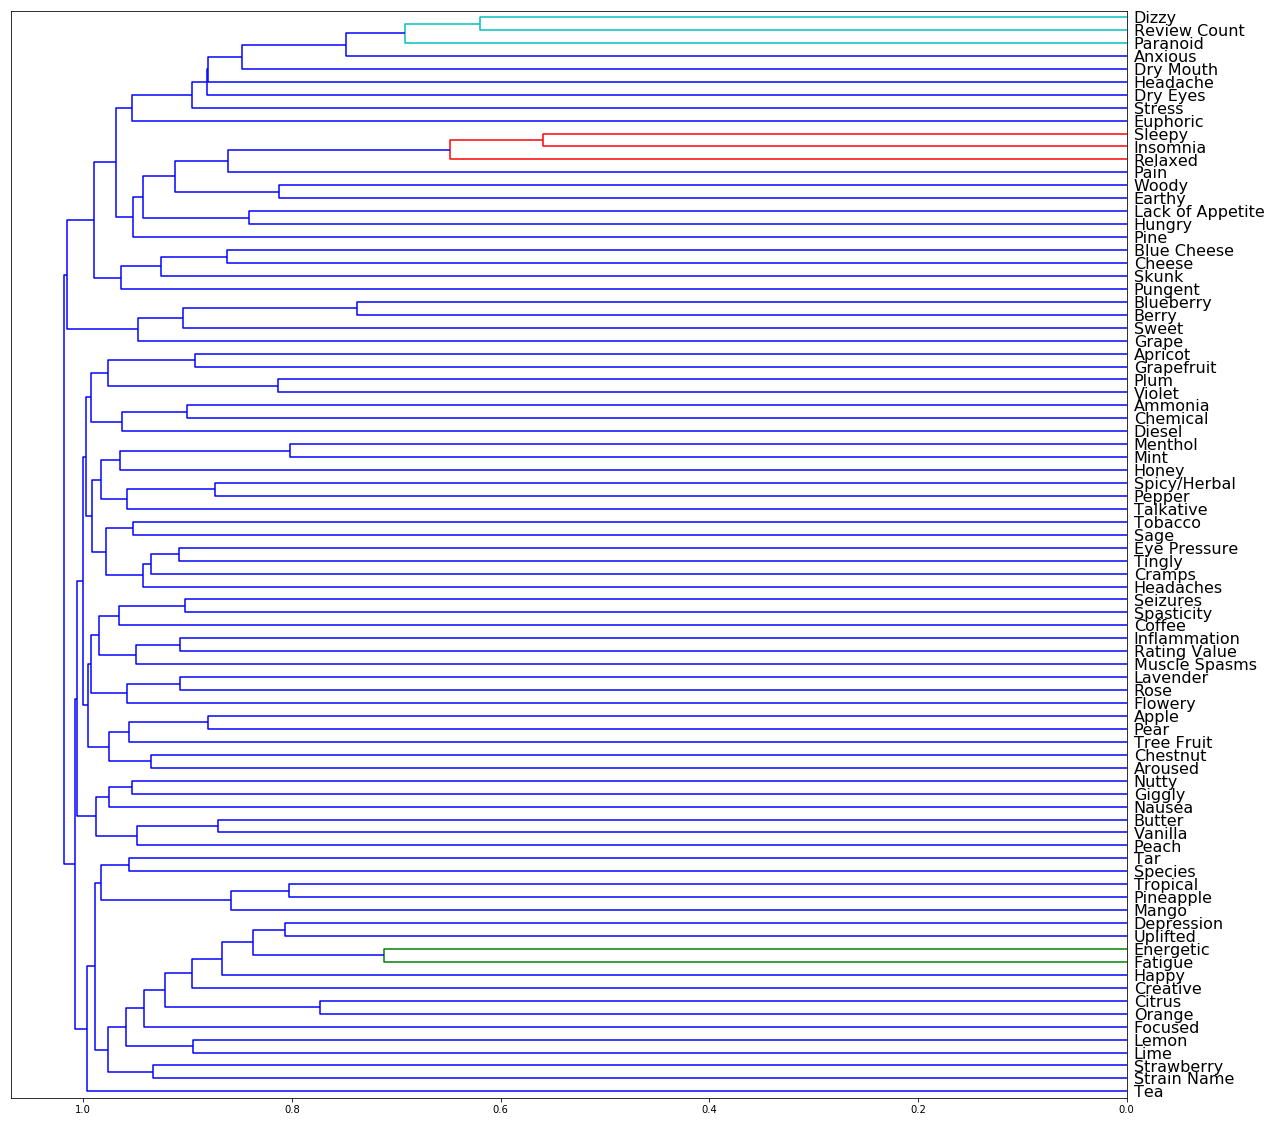

In [25]:
import scipy
from scipy.cluster import hierarchy as hc

corr = np.round(scipy.stats.spearmanr(df).correlation, 4)
corr_condensed = hc.distance.squareform(1-corr)
z = hc.linkage(corr_condensed, method='average')
fig = plt.figure(figsize=(20,20))
dendrogram = hc.dendrogram(z, labels=df.columns, orientation='left', leaf_font_size=16)
plt.show()

### Seaborn heatmap of correlations

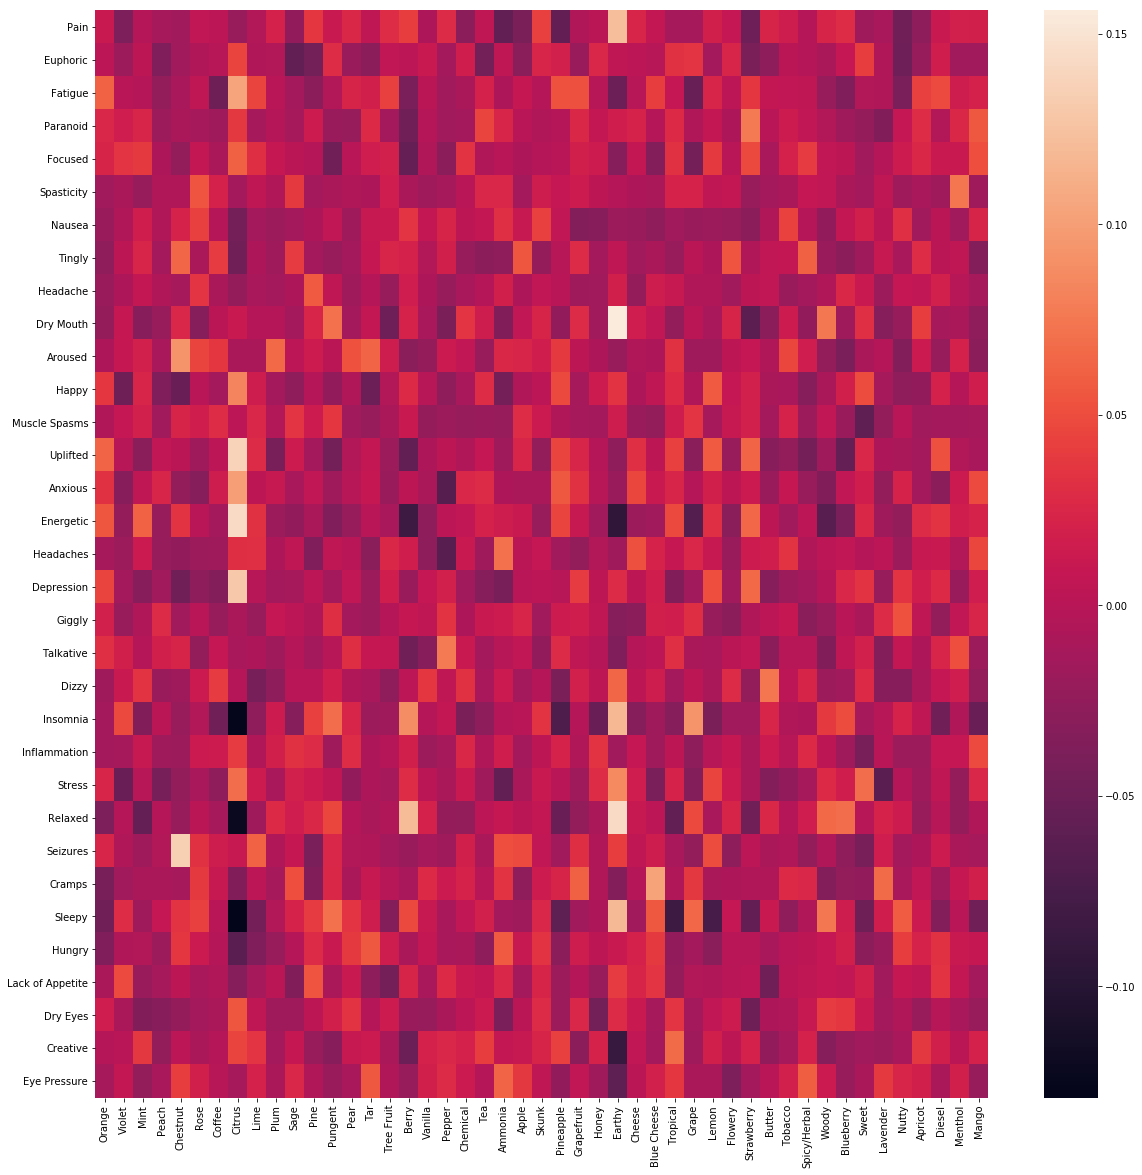

In [26]:
import seaborn as sns
corr = df.corr().iloc[2:35, 35:]
fig2 = plt.figure(figsize=(20,20))
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.index.values)
plt.show()

## Examining effects for top flavours
We can look at the individual effects of these different strains to see which have some effects overrepresented.

### Barplots of earthy, citrus, and sweet flavours vs effects

In [27]:
def flavour_barplot(df, x, aggr='mean'):
    earthy = df[x].loc[df['Earthy'] == 1].agg(aggr).T
    citrus = df[x].loc[df['Citrus'] == 1].agg(aggr).T
    sweet = df[x].loc[df['Sweet'] == 1].agg(aggr).T
    
    trace1 = go.Bar(
        x=x,
        y=earthy,
        name='Earthy'
    )
    trace2 = go.Bar(
        x=x,
        y=citrus,
        name='Citrus'
    )
    trace3 = go.Bar(
        x=x,
        y=sweet,
        name='Sweet'
    )

    data = [trace1, trace2, trace3]
    layout = go.Layout(
        barmode='group'
    )

    fig = go.Figure(data=data, layout=layout)
    iplot(fig)

In [28]:
flavour_barplot(df, positives)

In [29]:
flavour_barplot(df, medical)

In [30]:
flavour_barplot(df, negatives)

In [31]:
flavour_barplot(df, medical, aggr='sum')

In [32]:
flavour_barplot(df, positives, aggr='sum')

In [33]:
flavour_barplot(df, negatives, aggr='sum')

## Ranking top flavours for each effect

In [39]:
col = df[df['Dry Mouth'] > 0].astype(bool).sum(axis=0)[37:]; col

Orange            66
Violet             7
Mint              44
Peach              2
Chestnut           4
Rose              16
Coffee            25
Citrus           491
Lime              44
Plum               4
Sage              35
Pine             270
Pungent          370
Pear               2
Tar                6
Tree Fruit        26
Berry            309
Vanilla           23
Pepper            44
Chemical          35
Tea               12
Ammonia           15
Apple             20
Skunk            148
Pineapple         38
Grapefruit        27
Honey             24
Earthy          1008
Cheese            51
Blue Cheese        8
Tropical         132
Grape             91
Lemon            182
Flowery          233
Strawberry        37
Butter            14
Tobacco            7
Spicy/Herbal     207
Woody            265
Blueberry        143
Sweet            848
Lavender          32
Nutty             28
Apricot           11
Diesel           213
Menthol           13
Mango             25
dtype: int64

In [45]:
def sum_across_cols(df, effects):
    cols = []
    for effect in effects:
        cols.append(df[df[effect] > 0].astype(bool).sum(axis=0)[37:])
    new_df = pd.concat(cols, axis=1)
    new_df.columns = effects
    return new_df

In [62]:
sum_df = sum_across_cols(df, effects); rank_df

,Pain,Euphoric,Fatigue,Paranoid,Focused,Spasticity,Nausea,Tingly,Headache,Dry Mouth,...,Stress,Relaxed,Seizures,Cramps,Sleepy,Hungry,Lack of Appetite,Dry Eyes,Creative,Eye Pressure
Orange,58,52,43,40,23,1,11,8,28,66,...,68,49,2,1,15,12,28,61,25,6
Violet,5,4,2,4,3,0,2,1,3,7,...,4,6,0,0,4,1,4,4,3,2
Mint,39,39,22,25,18,0,13,9,22,44,...,47,33,0,4,14,9,17,37,21,3
Peach,2,1,0,1,1,0,1,0,1,2,...,1,2,0,0,1,0,1,1,0,0
Chestnut,3,2,1,2,0,0,1,2,1,4,...,3,2,1,0,2,2,1,2,1,1
Rose,13,14,6,7,5,2,6,3,8,16,...,16,15,1,3,10,5,7,14,5,3
Coffee,22,21,6,11,7,1,6,7,12,25,...,24,20,2,3,10,7,11,21,9,4
Citrus,418,400,248,285,163,11,97,57,207,491,...,494,378,6,34,119,93,187,460,202,51
Lime,37,33,25,21,17,1,7,7,19,44,...,43,34,2,4,10,6,15,40,20,6
Plum,4,3,1,2,2,0,0,0,2,4,...,4,4,0,0,2,0,1,3,1,1


In [76]:
sum_df.replace(0, np.nan, inplace=True); sum_df

,Pain,Euphoric,Fatigue,Paranoid,Focused,Spasticity,Nausea,Tingly,Headache,Dry Mouth,...,Stress,Relaxed,Seizures,Cramps,Sleepy,Hungry,Lack of Appetite,Dry Eyes,Creative,Eye Pressure
Orange,58,52,43.0,40.0,23.0,1.0,11.0,8.0,28.0,66,...,68,49,2.0,1.0,15,12.0,28,61,25.0,6.0
Violet,5,4,2.0,4.0,3.0,NaN,2.0,1.0,3.0,7,...,4,6,NaN,NaN,4,1.0,4,4,3.0,2.0
Mint,39,39,22.0,25.0,18.0,NaN,13.0,9.0,22.0,44,...,47,33,NaN,4.0,14,9.0,17,37,21.0,3.0
Peach,2,1,NaN,1.0,1.0,NaN,1.0,NaN,1.0,2,...,1,2,NaN,NaN,1,NaN,1,1,NaN,NaN
Chestnut,3,2,1.0,2.0,NaN,NaN,1.0,2.0,1.0,4,...,3,2,1.0,NaN,2,2.0,1,2,1.0,1.0
Rose,13,14,6.0,7.0,5.0,2.0,6.0,3.0,8.0,16,...,16,15,1.0,3.0,10,5.0,7,14,5.0,3.0
Coffee,22,21,6.0,11.0,7.0,1.0,6.0,7.0,12.0,25,...,24,20,2.0,3.0,10,7.0,11,21,9.0,4.0
Citrus,418,400,248.0,285.0,163.0,11.0,97.0,57.0,207.0,491,...,494,378,6.0,34.0,119,93.0,187,460,202.0,51.0
Lime,37,33,25.0,21.0,17.0,1.0,7.0,7.0,19.0,44,...,43,34,2.0,4.0,10,6.0,15,40,20.0,6.0
Plum,4,3,1.0,2.0,2.0,NaN,NaN,NaN,2.0,4,...,4,4,NaN,NaN,2,NaN,1,3,1.0,1.0


In [77]:
rank_df = sum_df.rank(axis=0, ascending=False, method='max', na_option='keep'); rank_df

,Pain,Euphoric,Fatigue,Paranoid,Focused,Spasticity,Nausea,Tingly,Headache,Dry Mouth,...,Stress,Relaxed,Seizures,Cramps,Sleepy,Hungry,Lack of Appetite,Dry Eyes,Creative,Eye Pressure
Orange,16.0,16.0,15.0,16.0,15.0,31.0,19.0,19.0,16.0,16.0,...,16.0,16.0,13.0,41.0,21.0,17.0,16.0,16.0,16.0,20.0
Violet,42.0,43.0,44.0,42.0,41.0,NaN,41.0,43.0,43.0,42.0,...,44.0,42.0,NaN,NaN,41.0,45.0,41.0,43.0,40.0,38.0
Mint,19.0,18.0,20.0,19.0,17.0,NaN,18.0,18.0,17.0,20.0,...,19.0,22.0,NaN,28.0,23.0,22.0,19.0,20.0,20.0,32.0
Peach,47.0,47.0,NaN,46.0,45.0,NaN,44.0,NaN,46.0,47.0,...,47.0,47.0,NaN,NaN,47.0,NaN,47.0,47.0,NaN,NaN
Chestnut,46.0,45.0,46.0,45.0,NaN,NaN,44.0,39.0,46.0,45.0,...,45.0,47.0,28.0,NaN,45.0,43.0,47.0,46.0,46.0,45.0
Rose,35.0,35.0,37.0,39.0,37.0,18.0,31.0,34.0,33.0,34.0,...,34.0,35.0,28.0,31.0,27.0,36.0,34.0,35.0,38.0,32.0
Coffee,28.0,30.0,37.0,33.0,32.0,31.0,31.0,22.0,25.0,30.0,...,31.0,32.0,13.0,31.0,27.0,30.0,27.0,30.0,30.0,26.0
Citrus,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,...,3.0,3.0,4.0,4.0,5.0,4.0,3.0,3.0,3.0,3.0
Lime,20.0,21.0,17.0,22.0,18.0,31.0,27.0,22.0,19.0,20.0,...,20.0,20.0,13.0,28.0,27.0,33.0,21.0,19.0,21.0,20.0
Plum,44.0,44.0,46.0,45.0,43.0,NaN,NaN,NaN,44.0,45.0,...,44.0,44.0,NaN,NaN,45.0,NaN,47.0,45.0,46.0,45.0


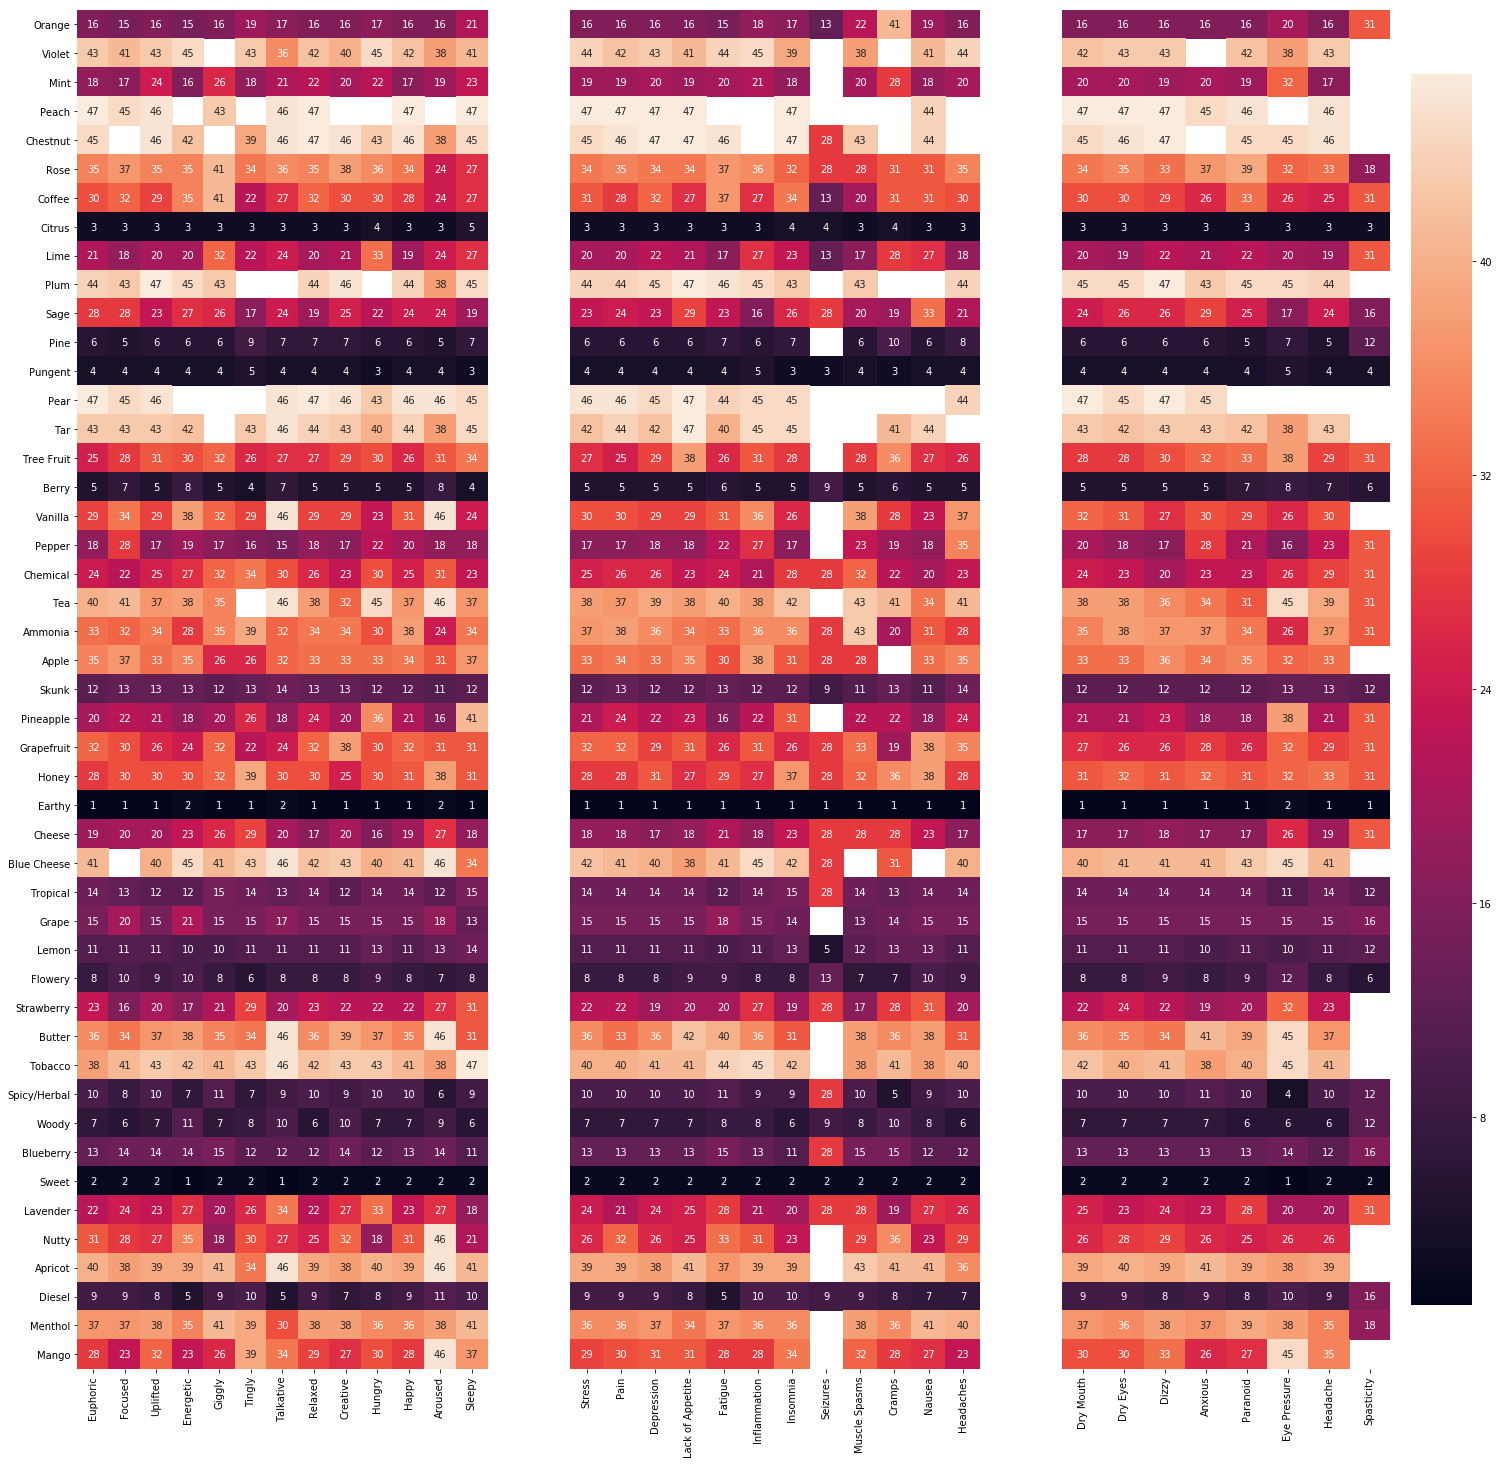

In [86]:
import seaborn as sns

fig3, ax = plt.subplots(1, 3, figsize=(25,25))

sns.heatmap(rank_df[positives], vmin=1, vmax=47, annot=True, fmt='.0f', ax=ax[0], cbar=False)
sns.heatmap(rank_df[medical], vmin=1, vmax=47, annot=True, fmt='.0f', ax=ax[1], cbar=False, yticklabels=False)
sns.heatmap(rank_df[negatives], vmin=1, vmax=47, annot=True, fmt='.0f', ax=ax[2], yticklabels=False)
plt.show()

In [89]:
sum_df['Seizures'].sort_index()

Ammonia          1.0
Apple            1.0
Apricot          NaN
Berry            3.0
Blue Cheese      1.0
Blueberry        1.0
Butter           NaN
Cheese           1.0
Chemical         1.0
Chestnut         1.0
Citrus           6.0
Coffee           2.0
Diesel           3.0
Earthy          18.0
Flowery          2.0
Grape            NaN
Grapefruit       1.0
Honey            1.0
Lavender         1.0
Lemon            5.0
Lime             2.0
Mango            NaN
Menthol          NaN
Mint             NaN
Nutty            NaN
Orange           2.0
Peach            NaN
Pear             NaN
Pepper           NaN
Pine             NaN
Pineapple        NaN
Plum             NaN
Pungent          7.0
Rose             1.0
Sage             1.0
Skunk            3.0
Spicy/Herbal     1.0
Strawberry       1.0
Sweet            9.0
Tar              NaN
Tea              NaN
Tobacco          NaN
Tree Fruit       NaN
Tropical         1.0
Vanilla          NaN
Violet           NaN
Woody            3.0
Name: Seizure

## Association rule learning with Apriori

In [126]:
rule_df = df[medical+flavours]; rule_df.tail(5)

,Stress,Pain,Depression,Lack of Appetite,Fatigue,Inflammation,Insomnia,Seizures,Muscle Spasms,Cramps,...,Spicy/Herbal,Woody,Blueberry,Sweet,Lavender,Nutty,Apricot,Diesel,Menthol,Mango
2165,77.192982,47.368421,100.000000,0.000000,36.842105,0.000000,0.000000,0.0,0.000000,0.0,...,0,0,0,1,0,0,0,0,0,0
2166,87.500000,100.000000,75.000000,0.000000,37.500000,0.000000,50.000000,0.0,0.000000,0.0,...,0,1,0,0,0,0,0,1,0,0
2167,100.000000,30.729167,35.937500,18.229167,0.000000,19.791667,0.000000,0.0,0.000000,0.0,...,0,0,0,0,1,0,0,0,0,0
2168,100.000000,0.000000,4.166667,0.000000,0.000000,4.166667,0.000000,0.0,8.333333,0.0,...,0,0,0,1,0,0,0,0,0,0
2169,100.000000,74.289026,49.582149,0.000000,0.000000,0.000000,37.455669,0.0,0.000000,0.0,...,0,1,0,0,0,0,0,0,0,0


In [127]:
rule_df = rule_df.astype('bool'); rule_df.tail(5)

,Stress,Pain,Depression,Lack of Appetite,Fatigue,Inflammation,Insomnia,Seizures,Muscle Spasms,Cramps,...,Spicy/Herbal,Woody,Blueberry,Sweet,Lavender,Nutty,Apricot,Diesel,Menthol,Mango
2165,True,True,True,False,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2166,True,True,True,False,True,False,True,False,False,False,...,False,True,False,False,False,False,False,True,False,False
2167,True,True,True,True,False,True,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
2168,True,False,True,False,False,True,False,False,True,False,...,False,False,False,True,False,False,False,False,False,False
2169,True,True,True,False,False,False,True,False,False,False,...,False,True,False,False,False,False,False,False,False,False


In [129]:
from mlxtend.frequent_patterns import apriori

frequent_itemsets = apriori(rule_df, min_support=0.3, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
frequent_itemsets

,support,itemsets,length
0,0.869124,(Stress),1
1,0.757604,(Pain),1
2,0.818433,(Depression),1
3,0.356221,(Lack of Appetite),1
4,0.364977,(Fatigue),1
5,0.463134,(Insomnia),1
6,0.306912,(Headaches),1
7,0.494470,(Earthy),1
8,0.433180,(Sweet),1
9,0.699539,"(Stress, Pain)",2


In [130]:
frequent_itemsets[ (frequent_itemsets['length'] == 2)]

,support,itemsets,length
9,0.699539,"(Stress, Pain)",2
10,0.752074,"(Stress, Depression)",2
11,0.317051,"(Stress, Lack of Appetite)",2
12,0.327650,"(Stress, Fatigue)",2
13,0.415207,"(Stress, Insomnia)",2
14,0.444700,"(Earthy, Stress)",2
15,0.389862,"(Stress, Sweet)",2
16,0.635945,"(Pain, Depression)",2
17,0.372811,"(Insomnia, Pain)",2
18,0.400000,"(Earthy, Pain)",2


In [131]:
from mlxtend.frequent_patterns import association_rules

rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.7); rules.sort_values('confidence', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
47,"(Earthy, Pain, Depression)",(Stress),0.337327,0.869124,0.322581,0.956284,1.100285,0.029401,2.993779
20,"(Pain, Depression)",(Stress),0.635945,0.869124,0.600000,0.943478,1.085550,0.047285,2.315491
27,"(Earthy, Pain)",(Stress),0.400000,0.869124,0.375115,0.937788,1.079003,0.027465,2.103704
36,"(Earthy, Depression)",(Stress),0.416129,0.869124,0.389401,0.935770,1.076681,0.027733,2.037597
39,"(Sweet, Depression)",(Stress),0.368664,0.869124,0.344240,0.933750,1.074357,0.023825,1.975480
30,"(Sweet, Pain)",(Stress),0.333641,0.869124,0.309677,0.928177,1.067945,0.019702,1.822191
24,"(Pain, Insomnia)",(Stress),0.372811,0.869124,0.344240,0.923362,1.062405,0.020220,1.707715
1,(Pain),(Stress),0.757604,0.869124,0.699539,0.923358,1.062400,0.041087,1.707615
3,(Depression),(Stress),0.818433,0.869124,0.752074,0.918919,1.057293,0.040753,1.614132
33,"(Insomnia, Depression)",(Stress),0.377419,0.869124,0.344240,0.912088,1.049433,0.016215,1.488710
